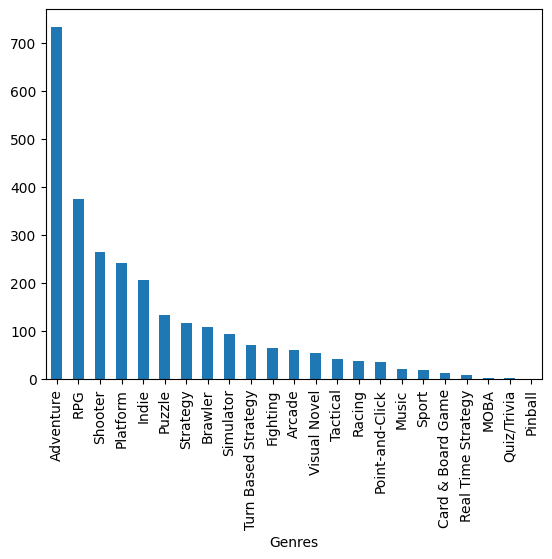

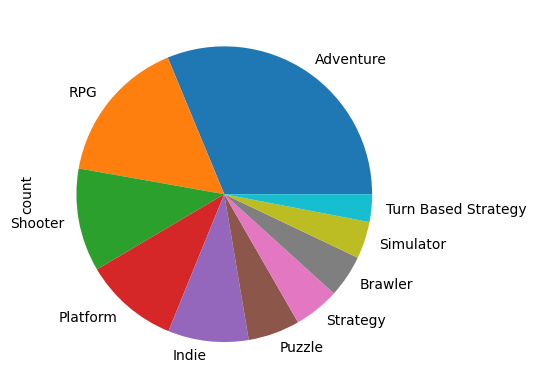

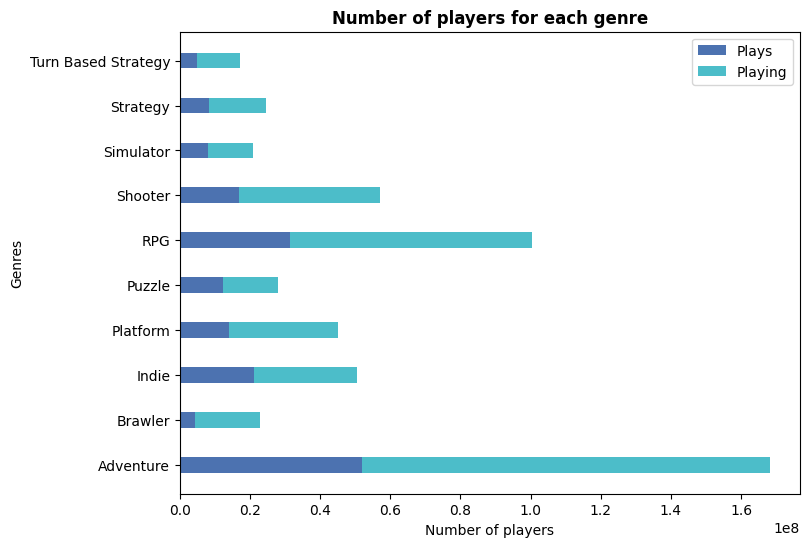

In [7]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from dateutil.parser import parse

filepath = "/Users/Shay/Documents/BCS/Programming -2.0/exercises/07-data-processing/games.csv"

data = pd.read_csv(filepath, index_col=0)
data.head()

# Remove duplicates
data = data.drop_duplicates()

# Convert columns with 'K' suffix to numeric values
columns_to_convert = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']
for column in columns_to_convert:
    data[column] = data[column].str.replace('K', '').astype(float) * 1000

# Convert string representation of lists in 'Genres' column to actual lists
data['Genres'] = data['Genres'].apply(lambda x: ast.literal_eval(x))

# Create a DataFrame with exploded genres
df_genres = pd.DataFrame({
    'Title': data['Title'].tolist(),
    'Genres': data['Genres'].tolist()
})
df_genres = df_genres.explode('Genres')

# Plotting genre distribution
count_genres = df_genres['Genres'].value_counts()
plot_genres = count_genres.plot(kind='bar')
plt.show()

# Plotting top genre distribution using pie chart
shortlist_genres = count_genres.head(10)
shortlist_plot = shortlist_genres.plot(kind='pie')
plt.show()

# Grouping by genres and summing up the plays and playing columns
top10genres = ['Adventure', 'RPG', 'Shooter', 'Platform', 'Indie', 'Puzzle', 'Strategy', 'Brawler', 'Simulator', 'Turn Based Strategy']
plays_genre_df = pd.DataFrame({
    'Title': data['Title'].tolist(),
    'Genres': data['Genres'].tolist(),
    'Plays': data['Plays'].tolist(),
    'Playing': data['Playing'].tolist()
})
plays_genre_df = plays_genre_df.explode('Genres')
plays_genre_df = plays_genre_df.groupby('Genres')[['Plays', 'Playing']].sum().reset_index()
plays_genre_df = plays_genre_df.loc[plays_genre_df['Genres'].isin(top10genres)]

# Plotting horizontal stacked bar chart
index = plays_genre_df['Genres'].tolist()
value1 = plays_genre_df['Plays'].tolist()
value2 = plays_genre_df['Playing'].tolist()

# Convert value2 to numeric
value2 = pd.to_numeric(value2)

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
bar1 = ax.barh(index, value1, bar_width, label='Plays', color='#4c72b0')
bar2 = ax.barh(index, value2, bar_width, left=value1, label='Playing', color='#4cbdc9')

ax.set_xlabel('Number of players')
ax.set_ylabel('Genres')
ax.set_title('Number of players for each genre', fontweight='bold')
ax.legend(loc='upper right')

plt.show()
